In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [3]:
df=pd.read_csv("Supermart.csv")

In [4]:
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [6]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [7]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
df=df.drop(columns=['Order ID','State'])

In [9]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB


In [11]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


Text(0, 0.5, 'Count')

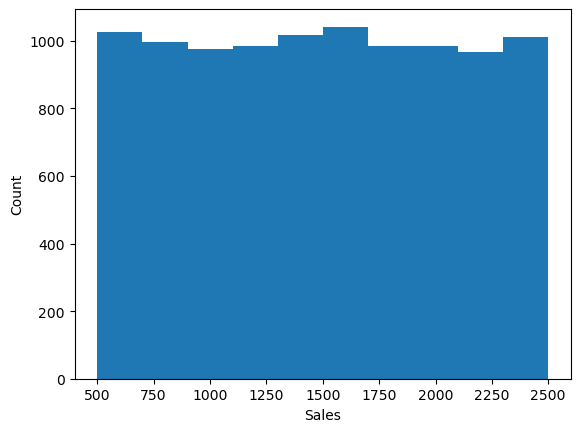

In [12]:
plt.hist(df['Sales'])
plt.xlabel("Sales")
plt.ylabel("Count")

Text(0, 0.5, 'Profit')

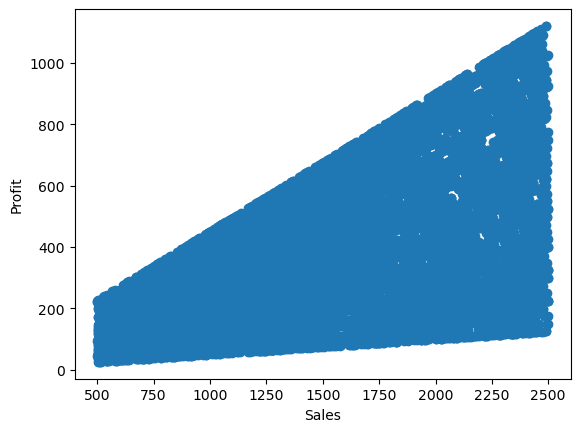

In [13]:
plt.scatter(x=df['Sales'],y=df['Profit'])
plt.xlabel("Sales")
plt.ylabel("Profit")

Text(0, 0.5, 'Profit')

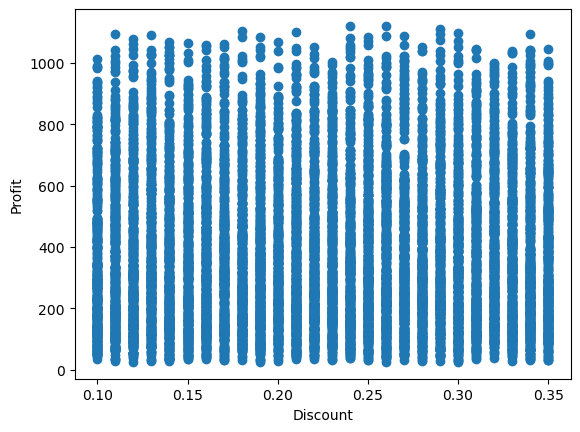

In [14]:
plt.scatter(df["Discount"], df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")

In [15]:
m_df=df.drop(columns=['Customer Name','Sub Category','City','Order Date'])

In [16]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  9994 non-null   object 
 1   Region    9994 non-null   object 
 2   Sales     9994 non-null   int64  
 3   Discount  9994 non-null   float64
 4   Profit    9994 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.5+ KB


In [17]:
m_df=pd.get_dummies(m_df,prefix='Category',columns=['Category'])
m_df=pd.get_dummies(m_df,prefix='Region',columns=['Region'])

In [18]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sales                       9994 non-null   int64  
 1   Discount                    9994 non-null   float64
 2   Profit                      9994 non-null   float64
 3   Category_Bakery             9994 non-null   uint8  
 4   Category_Beverages          9994 non-null   uint8  
 5   Category_Eggs, Meat & Fish  9994 non-null   uint8  
 6   Category_Food Grains        9994 non-null   uint8  
 7   Category_Fruits & Veggies   9994 non-null   uint8  
 8   Category_Oil & Masala       9994 non-null   uint8  
 9   Category_Snacks             9994 non-null   uint8  
 10  Region_Central              9994 non-null   uint8  
 11  Region_East                 9994 non-null   uint8  
 12  Region_North                9994 non-null   uint8  
 13  Region_South                9994 

In [19]:
df_train, df_test = train_test_split(m_df, test_size=0.2, random_state=0)

In [20]:
dtrain = xgb.DMatrix(
    df_train.loc[:, df_train.columns != "Profit"], label=df_train["Profit"]
)
dtest = xgb.DMatrix(
    df_test.loc[:, df_test.columns != "Profit"], label=df_test["Profit"]
)

In [21]:
param = {
    "max_depth": 2,
    "eta": 0.03,
    "gamma": 0.09,
    "colsample_bytree": 0.5,
    "objective": "reg:squarederror",
}
num_round = 100
bst = xgb.train(param,dtrain, num_round)

In [22]:
preds = bst.predict(dtest)

In [23]:
from sklearn.metrics import r2_score, accuracy_score
r2_score(df_test["Profit"], preds)

0.35175360925024723

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

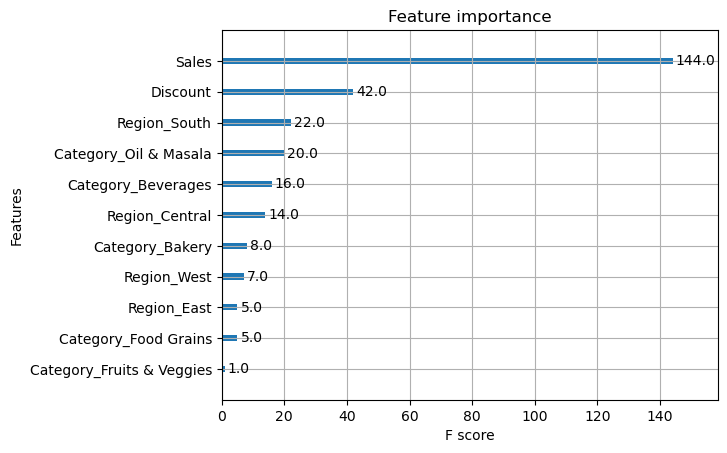

In [24]:
xgb.plot_importance(bst)